In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

df = pd.read_csv('/content/food_expiry_tracker.csv')
df.head()


,purchase_month,purchase_day_of_week,days_until_expiry,quantity,used_before_expiry,item_beverage,item_dairy,item_fruit,item_grain,item_meat,item_snack,item_vegetable,storage_freezer,storage_fridge,storage_pantry
0,0.000000,0.000000,0.041322,0.555556,1,False,False,False,False,False,False,True,False,True,False
1,0.636364,0.166667,0.209366,0.555556,1,False,False,False,True,False,False,False,True,False,False
2,0.181818,0.000000,0.595041,0.333333,1,True,False,False,False,False,False,False,False,True,False
3,0.181818,0.500000,0.022039,0.555556,1,False,True,False,False,False,False,False,False,True,False
4,0.818182,0.666667,0.526171,1.000000,1,False,False,False,False,False,True,False,True,False,False


In [4]:
# Overview of numerical columns
df.describe()

# For categorical features
# df.describe(include='object')

,purchase_month,purchase_day_of_week,days_until_expiry,quantity,used_before_expiry
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.481273,0.483000,0.203030,0.498889,0.786000
std,0.304593,0.328437,0.276491,0.322926,0.410538
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.181818,0.166667,0.016529,0.222222,1.000000
50%,0.454545,0.500000,0.037190,0.555556,1.000000
75%,0.727273,0.833333,0.371901,0.777778,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


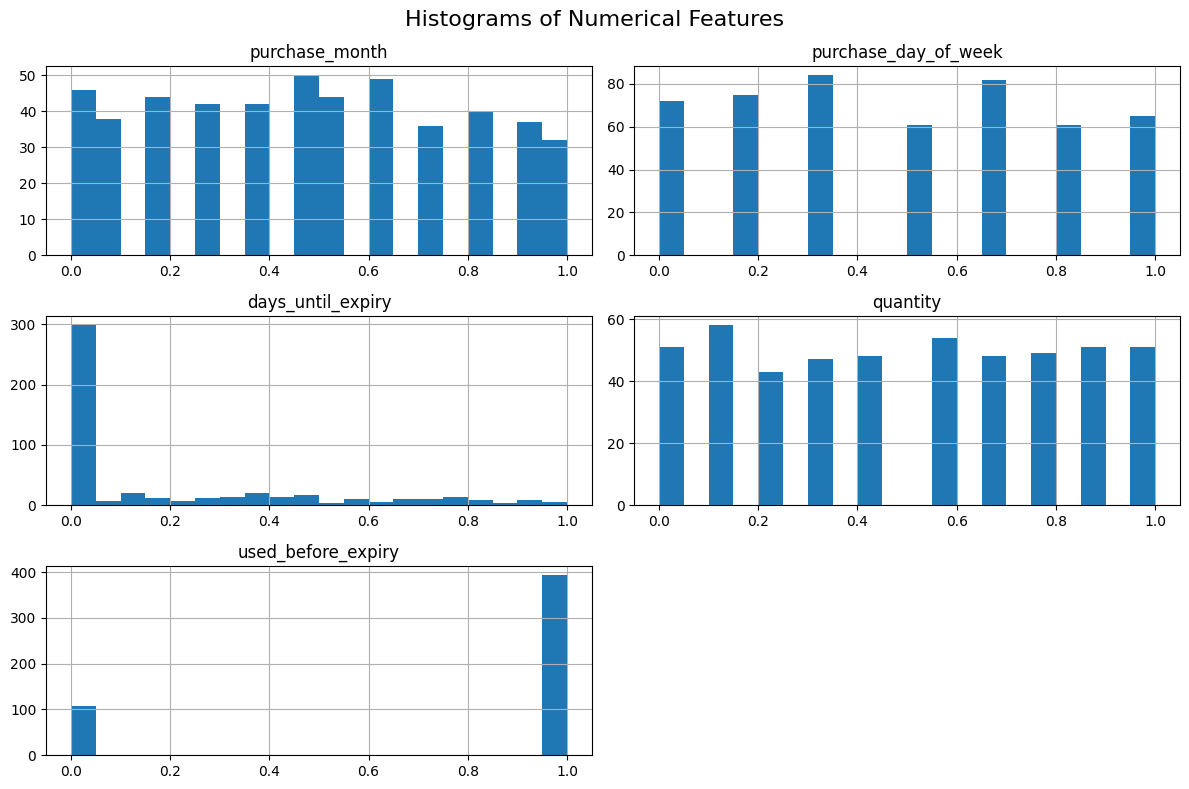

In [5]:
df.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()


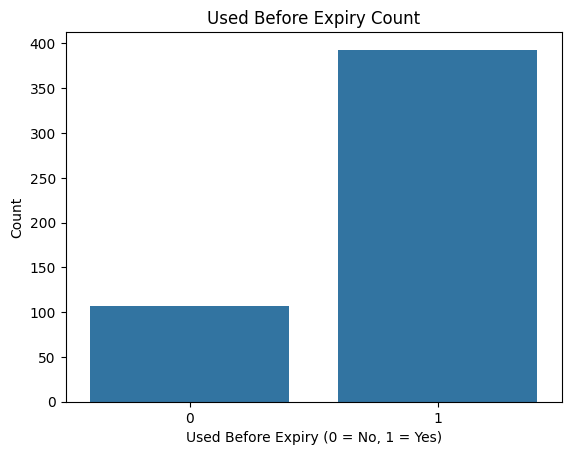

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Bar plot of how many items were used before expiry
sns.countplot(x='used_before_expiry', data=df)
plt.title("Used Before Expiry Count")
plt.xlabel("Used Before Expiry (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()



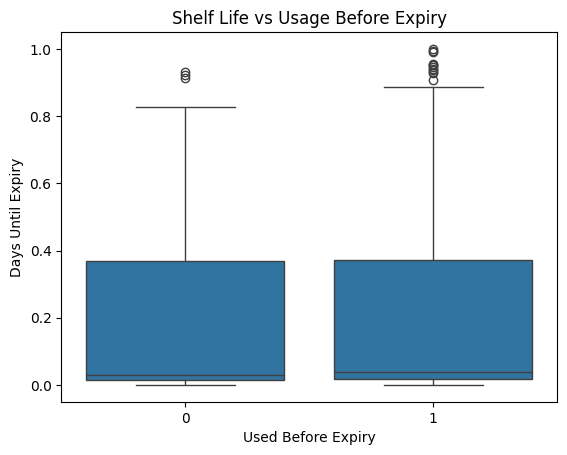

In [7]:
sns.boxplot(x='used_before_expiry', y='days_until_expiry', data=df)
plt.title("Shelf Life vs Usage Before Expiry")
plt.xlabel("Used Before Expiry")
plt.ylabel("Days Until Expiry")
plt.show()


In [8]:
# Mean usage rate by storage method
storage_cols = ['storage_freezer', 'storage_fridge', 'storage_pantry']

for col in storage_cols:
    avg_usage = df.groupby(col)['used_before_expiry'].mean()
    print(f"\nAverage usage rate for {col}:\n{avg_usage}")



Average usage rate for storage_freezer:
storage_freezer
False    0.760234
True     0.841772
Name: used_before_expiry, dtype: float64

Average usage rate for storage_fridge:
storage_fridge
False    0.803279
True     0.758974
Name: used_before_expiry, dtype: float64

Average usage rate for storage_pantry:
storage_pantry
False    0.796034
True     0.761905
Name: used_before_expiry, dtype: float64


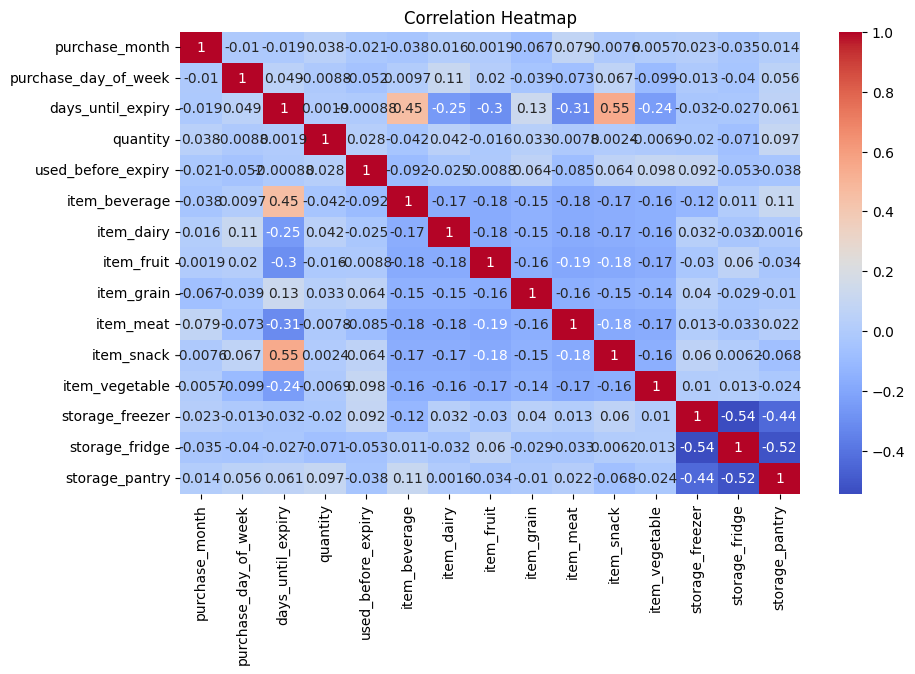

In [9]:
import numpy as np

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


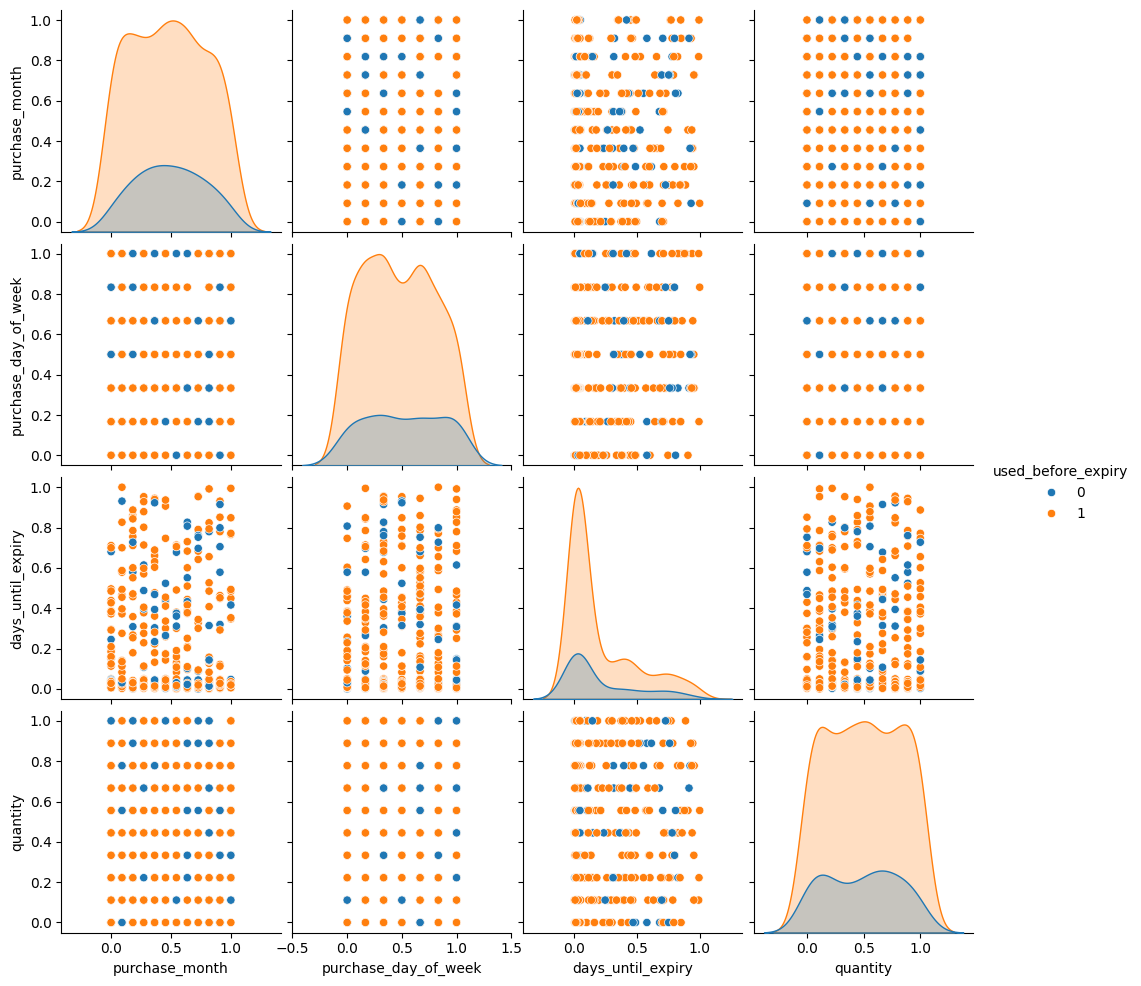

In [10]:
import seaborn as sns

# Selecting numeric features for pairplot
selected_cols = ['purchase_month', 'purchase_day_of_week', 'days_until_expiry', 'quantity', 'used_before_expiry']

sns.pairplot(df[selected_cols], hue='used_before_expiry')


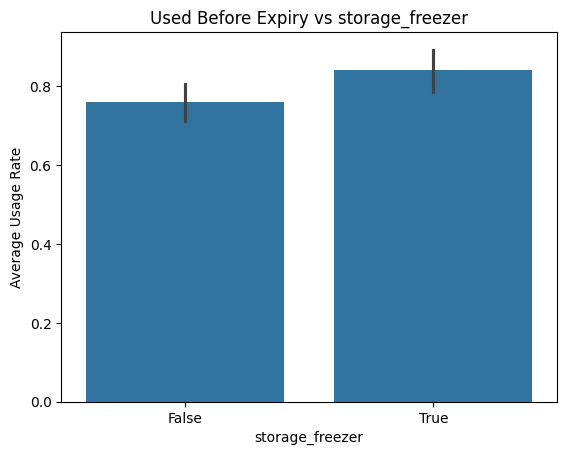

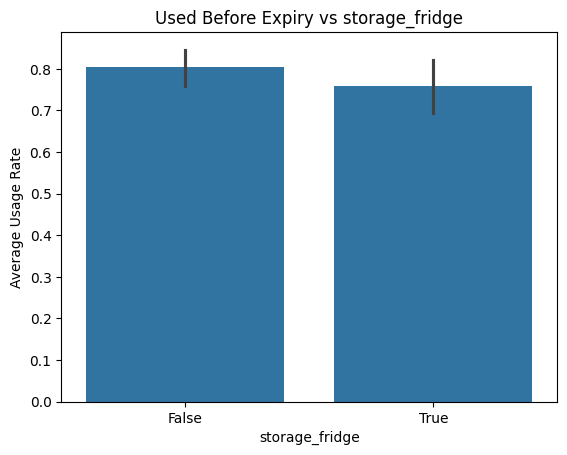

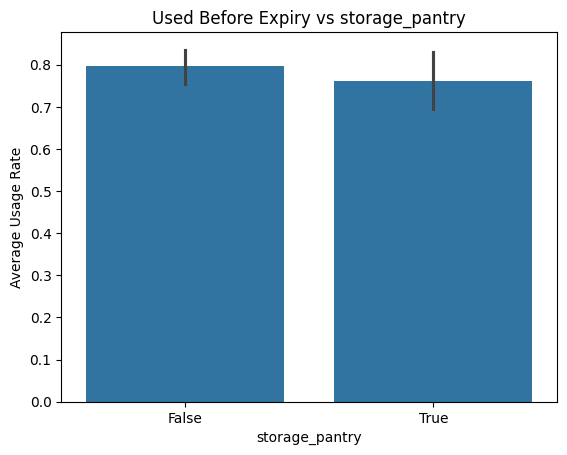

In [11]:
storage_cols = ['storage_freezer', 'storage_fridge', 'storage_pantry']

for col in storage_cols:
    sns.barplot(x=col, y='used_before_expiry', data=df)
    plt.title(f"Used Before Expiry vs {col}")
    plt.ylabel("Average Usage Rate")
    plt.show()


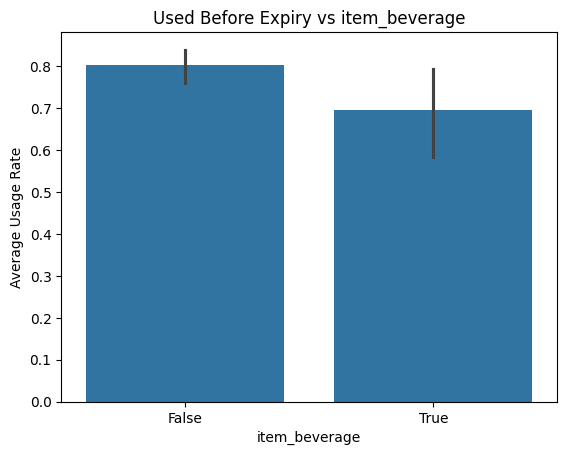

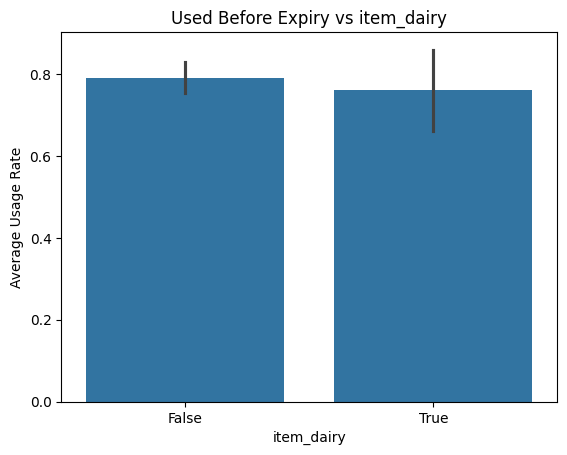

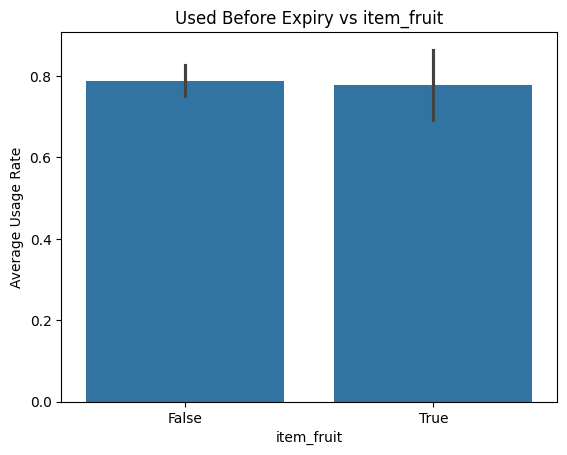

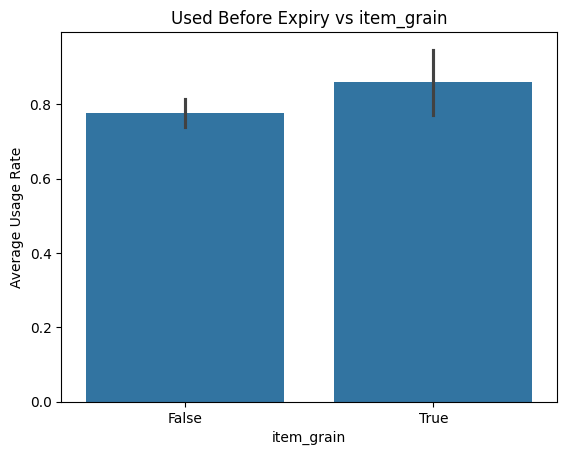

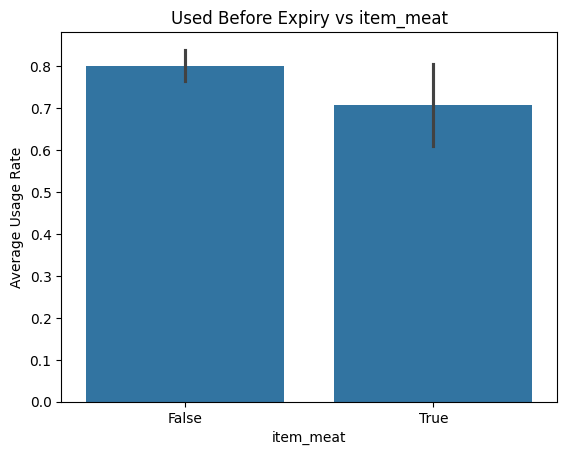

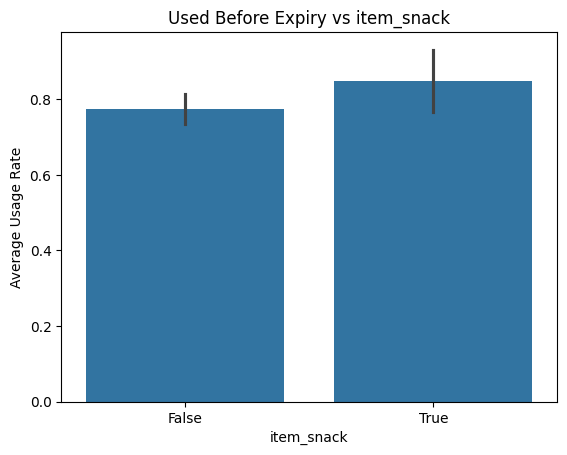

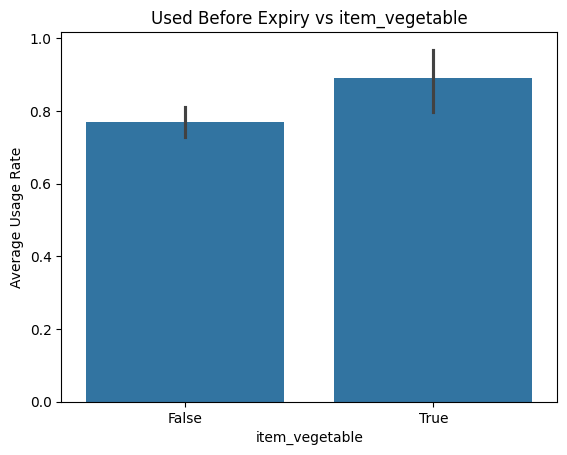

In [12]:
item_cols = [col for col in df.columns if 'item_' in col]

for col in item_cols:
    sns.barplot(x=col, y='used_before_expiry', data=df)
    plt.title(f"Used Before Expiry vs {col}")
    plt.ylabel("Average Usage Rate")
    plt.show()


In [13]:
import plotly.express as px

fig = px.histogram(df,
                   x='days_until_expiry',
                   color='used_before_expiry',
                   nbins=30,
                   title="Days Until Expiry by Usage",
                   labels={'used_before_expiry': 'Used Before Expiry'})
fig.show()
